In [30]:
import os
import numpy as np
import pandas as pd
import pylab as pl

pd.options.display.max_columns = None
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
stations_class = pd.read_csv('Clean_Data/stations_class_all.csv')

In [32]:
stations_class.head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
0,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0,1
1,445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0,1
2,487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0,1
3,504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0,1
4,72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0,5


In [33]:
stations_class = stations_class[[0,-1]]

In [34]:
stations_class.head()

,station_id,label
0,301,1
1,445,1
2,487,1
3,504,1
4,72,5


In [35]:
tripdata = pd.read_csv('~/ADS_project/Large_data/tripdata_new.csv')

In [36]:
tripdata.shape

(9937969, 8)

In [37]:
tripdata.head()

,tripduration,starttime,stoptime,start station id,end station id,bikeid,birth year,gender
0,801,2015-02-01 00:00:00,2015-02-01 00:14:00,521,423,17131,1978.0,2
1,379,2015-02-01 00:00:00,2015-02-01 00:07:00,497,504,21289,1993.0,1
2,2474,2015-02-01 00:01:00,2015-02-01 00:42:00,281,127,18903,1969.0,2
3,818,2015-02-01 00:01:00,2015-02-01 00:15:00,2004,505,21044,1985.0,2
4,544,2015-02-01 00:01:00,2015-02-01 00:10:00,323,83,19868,1957.0,1


In [38]:
tripdata = tripdata.merge(stations_class, how='left', left_on='start station id', right_on='station_id')

In [39]:
tripdata.head()

,tripduration,starttime,stoptime,start station id,end station id,bikeid,birth year,gender,station_id,label
0,801,2015-02-01 00:00:00,2015-02-01 00:14:00,521,423,17131,1978.0,2,NaN,NaN
1,379,2015-02-01 00:00:00,2015-02-01 00:07:00,497,504,21289,1993.0,1,497.0,4.0
2,2474,2015-02-01 00:01:00,2015-02-01 00:42:00,281,127,18903,1969.0,2,281.0,3.0
3,818,2015-02-01 00:01:00,2015-02-01 00:15:00,2004,505,21044,1985.0,2,NaN,NaN
4,544,2015-02-01 00:01:00,2015-02-01 00:10:00,323,83,19868,1957.0,1,323.0,0.0


In [40]:
tripdata = tripdata.dropna()

In [41]:
tripdata.head()

,tripduration,starttime,stoptime,start station id,end station id,bikeid,birth year,gender,station_id,label
1,379,2015-02-01 00:00:00,2015-02-01 00:07:00,497,504,21289,1993.0,1,497.0,4.0
2,2474,2015-02-01 00:01:00,2015-02-01 00:42:00,281,127,18903,1969.0,2,281.0,3.0
4,544,2015-02-01 00:01:00,2015-02-01 00:10:00,323,83,19868,1957.0,1,323.0,0.0
5,717,2015-02-01 00:02:00,2015-02-01 00:14:00,373,2002,15854,1979.0,1,373.0,0.0
7,913,2015-02-01 00:04:00,2015-02-01 00:19:00,439,116,17862,1955.0,1,439.0,1.0


In [42]:
tripdata.shape

(7153274, 10)

In [43]:
stations = [tripdata[tripdata['label']==i]['tripduration'].reset_index() for i in range(0,6)]

In [44]:
type(stations[0])

pandas.core.frame.DataFrame

In [45]:
#a = stations[0]['tripduration'].astype('float')

In [46]:
for i in range(6):
    print(log10(stations[i]['tripduration']).describe())

count    978297.000000
mean          2.795015
std           0.338221
min           1.778151
25%           2.555094
50%           2.800029
75%           3.043755
max           6.468008
Name: tripduration, dtype: float64
count    1.705732e+06
mean     2.742406e+00
std      2.868149e-01
min      1.778151e+00
25%      2.553883e+00
50%      2.741152e+00
75%      2.927370e+00
max      6.573217e+00
Name: tripduration, dtype: float64
count    167549.000000
mean          2.775233
std           0.360952
min           1.778151
25%           2.511883
50%           2.770852
75%           3.045714
max           6.191335
Name: tripduration, dtype: float64
count    1.394532e+06
mean     2.759030e+00
std      2.928084e-01
min      1.778151e+00
25%      2.565848e+00
50%      2.753583e+00
75%      2.946943e+00
max      6.353757e+00
Name: tripduration, dtype: float64
count    801350.000000
mean          2.755669
std           0.287444
min           1.778151
25%           2.568202
50%           2.745075
75

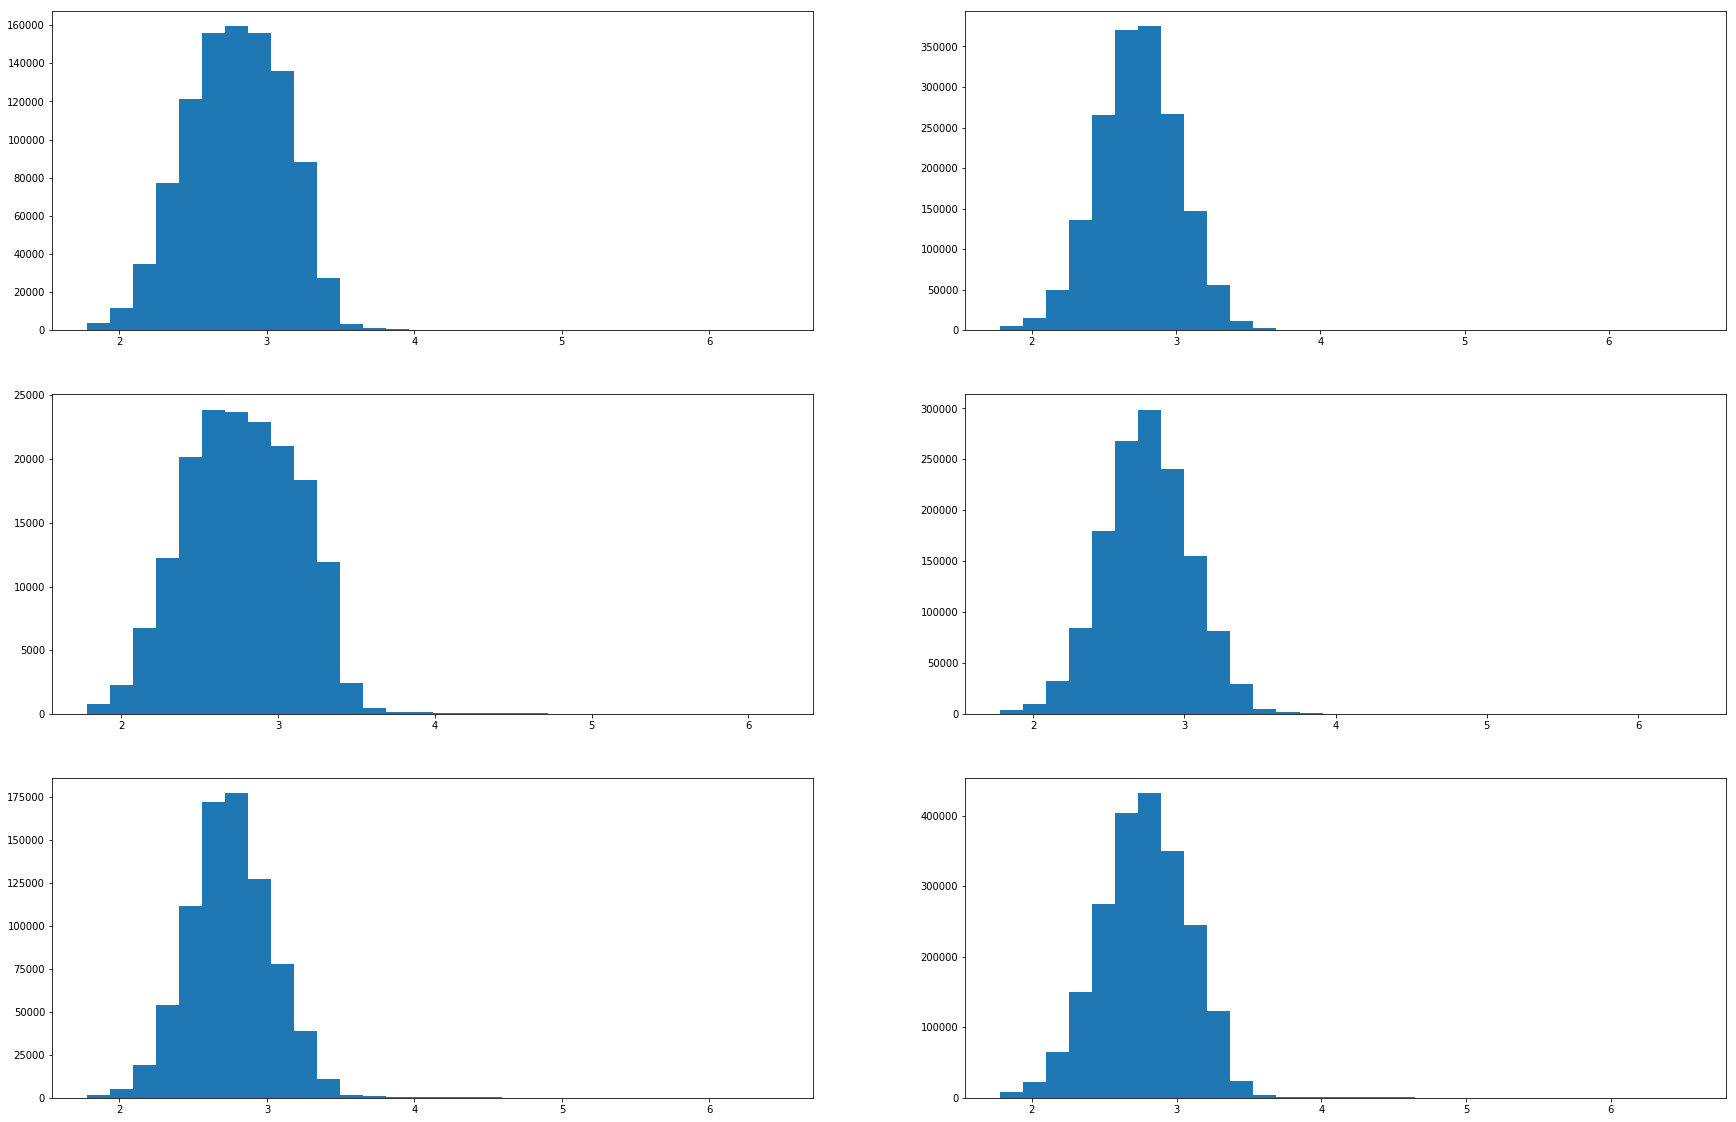

In [29]:
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.hist((log10(stations[i]['tripduration'])),bins=30)

## Better plot 

add x-axis, y-axis and title to explain what is the plot?

Maybe you can limit the data to a range (as when log10(tripduration)>4, the count is very low) and try to change the bins number, making the different of each plot more obvious.

summary the different of trip duaration in each type for our pre. (Also consider the describe of data)

In [ ]:
stations = [tripdata[tripdata['label']==i]['tripduration'] for i in range(0,6)]